In [10]:
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd

In [11]:
#Define a function to connect to the database
def connectDB():
    conn = psycopg2.connect(
        host="localhost",
        database="Database_box_office",
        user="postgres",
        password="Kip123")
    return conn

#Call the function to connect to the DB
conn = connectDB()
print("Connection successful.")

#Close connection
conn.close()
print("Connection closed.")


Connection successful.
Connection closed.


In [12]:
#Connect to the database
conn = connectDB()
print("Connection successful.")

#Make a cursor 
cur = conn.cursor()

#Run the SQL query
#This query creates categories based on the production budget, but nothing was found for category 9, so it was filled with 0
cur.execute("""SELECT 
	CASE 
	WHEN production_budget >= 1100 AND production_budget <= 40000990 THEN 1
	WHEN production_budget >= 40001000  AND production_budget <= 80001890 THEN 2
	WHEN production_budget >= 80001900  AND production_budget <= 120001790 THEN 3
	WHEN production_budget >= 120001800  AND production_budget <= 160001690 THEN 4
	WHEN production_budget >= 160001700  AND production_budget <= 200001590 THEN 5
	WHEN production_budget >= 200001600  AND production_budget <= 240001490 THEN 6
	WHEN production_budget >= 240001500  AND production_budget <= 280001390 THEN 7
	WHEN production_budget >= 280001400  AND production_budget <= 320001290 THEN 8
	WHEN production_budget >= 320001300  AND production_budget <= 360001190 THEN 9
	WHEN production_budget >= 360001200   AND production_budget <= 400000000 THEN 10
	WHEN production_budget = 0 Then 0
	END AS production_budget_cat,
	AVG(total_box_office) as average_box_office 	
FROM Sales
GROUP BY production_budget_cat

UNION

SELECT
    9 AS production_budget,
    0 AS average_box_office
ORDER BY production_budget_cat;""")

#Retrieve the results
result = cur.fetchall()

#Close the cursor and the connection
cur.close()
conn.close()
print("Connection closed.")

#Put the results into a DataFrame
df = pd.DataFrame(result, columns=['production_budget_cat', 'average_box_office'])

#Print the results
print(df)

Connection successful.
Connection closed.
    production_budget_cat  average_box_office
0                       0        3.220291e+06
1                       1        3.870904e+07
2                       2        1.467372e+08
3                       3        2.655542e+08
4                       4        4.586674e+08
5                       5        5.871226e+08
6                       6        8.015166e+08
7                       7        9.333716e+08
8                       8        1.321884e+09
9                       9        0.000000e+00
10                     10        1.746277e+09


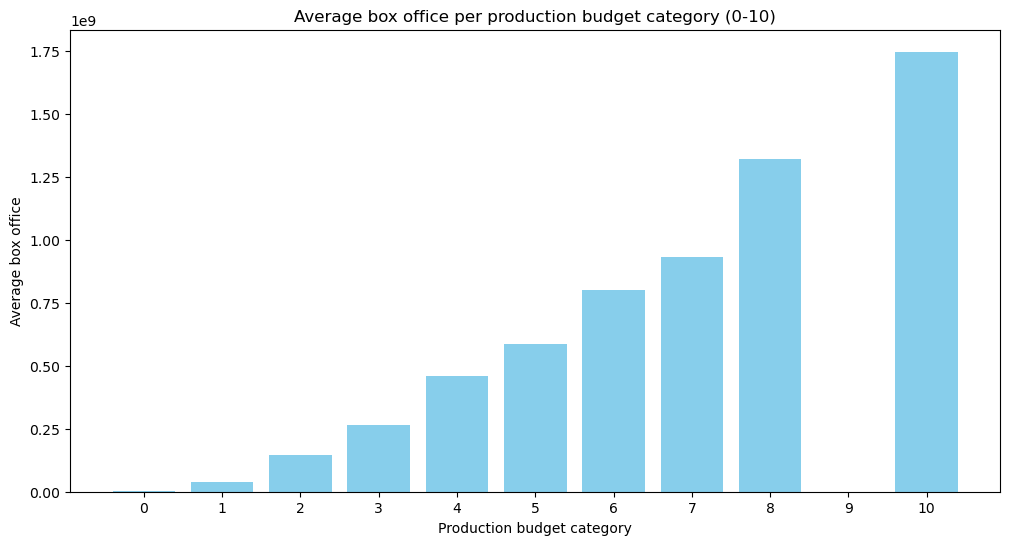

In [9]:
#Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['production_budget_cat'], df['average_box_office'], color='skyblue')

#Add titles and labels
plt.title('Average box office per production budget category (0-10)')
plt.xlabel('Production budget category')
plt.ylabel('Average box office')

#Set the x-axis labels in a chart based on the data in the 'production_budget_cat' column of the DataFrame 'df'."
plt.xticks(df['production_budget_cat'])

#Show the chart
plt.show()